In [1]:
import requests
from __future__ import print_function    # (at top of module)
import json
import time
import sys
import pandas as pd
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials



In [2]:


scope = 'user-library-read'

if len(sys.argv) > 1:
    #username = sys.argv[1]
    username = 'tomsyouruncle'
else:
    print "Usage: %s username" % (sys.argv[0],)
    sys.exit()

token = util.prompt_for_user_token(username, scope)

if token:
    sp = spotipy.Spotify(auth=token)
    results = sp.current_user_saved_tracks()
    for item in results['items']:
        track = item['track']
        print track['name'] + ' - ' + track['artists'][0]['name']
else:
    print "Can't get token for", username



            User authentication requires interaction with your
            web browser. Once you enter your credentials and
            give authorization, you will be redirected to
            a url.  Paste that url you were directed to to
            complete the authorization.

        
Opening https://accounts.spotify.com/authorize?scope=user-library-read&redirect_uri=https%3A%2F%2Finfinite-retreat-20488.herokuapp.com&response_type=code&client_id=ccad60ae1514430482855e1e4a2cc1e8 in your browser


Enter the URL you were redirected to: https://infinite-retreat-20488.herokuapp.com/?code=AQD087yVPbSe4iSLwOJXOaTWPNYS2pjM7hxeTXSj6vQ6N2fnDP-bNNT5B9aKYtQ-VK55xVtGoiOmUJolWV5vUxEq0K7_T46M9-nHog_9ncnxKVMg2W-11BKcndyRAT-cbHwE76wIK6mIM3D7CPeU-WwZgWrXLUUb0zVfz2Yp9LNY8X8EcztVlbbHzq2j1_cen3DST5ZMGv2dgs7AKmhYiGuzeDnUGurSi9IQkHKjscH0CXePsQ


Dreams - Beck
Winter - Daughter
Smother - Daughter
Youth - Daughter
Still - Daughter
Lifeforms - Daughter
Tomorrow - Daughter
Human - Daughter
Touch - Daughte

In [2]:
import sys
import os
import spotipy
import spotipy.util as util

def get_tracks_from_playlist_OLD(username,playlist_id):  
    output_ids = [] 
    token = util.prompt_for_user_token(username)
    if token:
        top = 40
        sp = spotipy.Spotify(auth=token)
        playlists = sp.user_playlists(username)
        for playlist in playlists['items']:
            if (playlist['owner']['id'] == username) & (playlist['id'] == playlist_id):
                results = sp.user_playlist(username, playlist['id'], fields="tracks,next")
                tracks = results['tracks']
                for i, item in enumerate(tracks['items']):
                    track = item['track']
                    output_ids.append(str(track['id']))
        return output_ids
    else:
        print("Can't get token for", username)

def get_tracks_from_playlist(username,p_id):  
    output_ids = [] 
    token = util.prompt_for_user_token(username)
    if token:
        sp = spotipy.Spotify(auth=token)
        results = sp.user_playlist(username, p_id, fields="tracks,next")
        tracks = results['tracks']
        for i, item in enumerate(tracks['items']):
            track = item['track']
            output_ids.append(str(track['id']))
        return output_ids
    else:
        print("Can't get token for", username)



def features_list(track_ids_array):
    client_credentials_manager = SpotifyClientCredentials()
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    sp.trace = False
    features = sp.audio_features(track_ids_array)
    return pd.read_json(json.dumps(features, indent=4))

#info on feature definitions here: https://developer.spotify.com/web-api/get-recommendations/

In [9]:
track_features.columns.values

array([u'acousticness', u'analysis_url', u'danceability', u'duration_ms',
       u'energy', u'id', u'instrumentalness', u'key', u'liveness',
       u'loudness', u'mode', u'speechiness', u'tempo', u'time_signature',
       u'track_href', u'type', u'uri', u'valence'], dtype=object)

In [3]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
playlists = pd.read_csv('spotify_playlists.csv')

In [5]:
playlists

,playlist_id,playlist_name,user_id
0,2Ejbdf2DC9JGr5qdT0Z852,Old School Hip Hop House Party,spotify_uk_
1,7wUUwoxU2S6BRKA2bDPYKD,Massive dance hits,spotify_uk_
2,2aUKPl1SatBDloOMrR1hAp,Indie Roadtrip,spotify_uk_
3,5O2ERf8kAYARVVdfCKZ9G7,Coffee Table Jazz,spotify
4,6CRNGyV2hoQDyYpUPjHrkz,Top Classical,spotify
5,4EMB7RVcDBWTJDzsr1jXMe,Spin Deep House 40,goldjr


In [6]:
data_array = []
for i in xrange(6):
    print(i)
    table = features_list(get_tracks_from_playlist(playlists.ix[i,2],playlists.ix[i,0]))
    table['playlist_id'] = playlists.ix[i,0]
    table['playlist_name'] = playlists.ix[i,1]
    table['data_set'] = i
    data_array.append(table)
master_dataset = pd.concat(data_array)



0
1
2
3
4
5


In [7]:
master_dataset.shape

(347, 21)

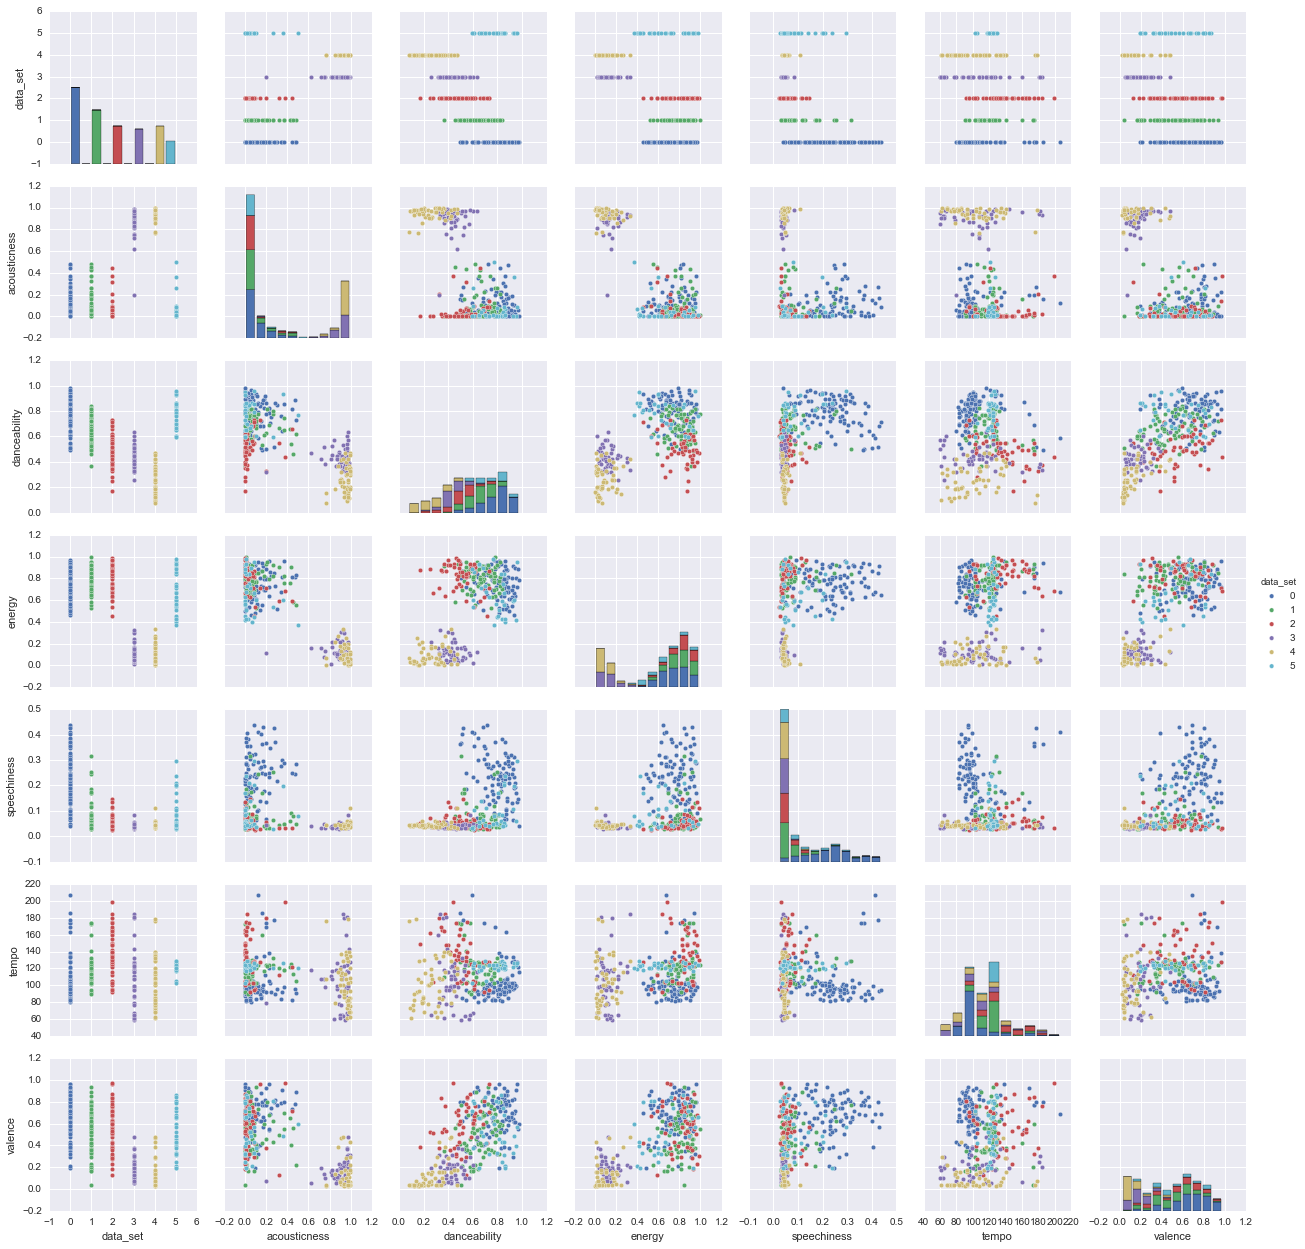

In [8]:
feature_subset = master_dataset[['playlist_name','data_set','acousticness','danceability','energy','speechiness','tempo','valence']]
sb.pairplot(feature_subset.dropna(), hue='data_set')

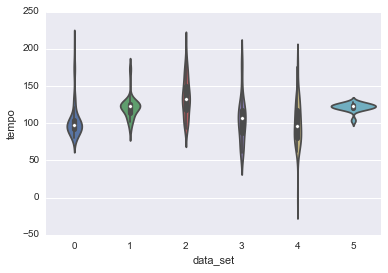

In [101]:
sb.violinplot(x='data_set', y='tempo', data=feature_subset)

TypeError: 'PairGrid' object does not support indexing

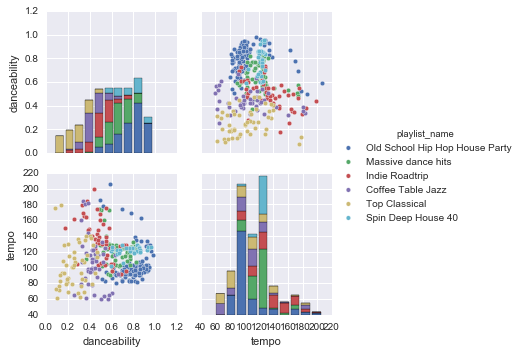

In [92]:
tempo_vs_danceable = master_dataset[['playlist_name','danceability','tempo',]]
sb.pairplot(tempo_vs_danceable.dropna(), hue='playlist_name')[0]

In [94]:
sb.violinplot?